# Ad Sales Data
# Revenue Regression
Code link: https://www.kaggle.com/code/akshaysunil07/ad-tech-revenue-regression/notebook 

# Installing packages section

In [ ]:
# Installing packages set for without init script
!pip install --upgrade pip
!pip install "snowflake-connector-python[pandas]" "snowflake-snowpark-python[pandas]" snowflake-snowpark-python==1.9.0 fosforio fosforml numpy pandas matplotlib scikit-learn xgboost seaborn python-dateutil tqdm holidays faker
!pip install --upgrade --q snowflake-snowpark-python==1.9.0
!pip uninstall urllib3 -y
!pip install urllib3==1.26.15

In [ ]:
# pre run in template init script

! pip install "snowflake-connector-python[pandas]"
! sudo pip install snowflake-ml-python==1.0.11 -U
! pip install --upgrade snowflake-snowpark-python==1.9.0
!pip install --q seaborn
!pip install --q plotly 
! pip install --upgrade xgboost==1.7.3
! pip install --upgrade numpy==1.24.3
! pip install --upgrade pandas==1.5.3
! pip install --upgrade anyio==3.5.0
! pip install --upgrade packaging==23.1
! pip install --upgrade scikit-learn==1.3.0
! pip install --upgrade typing-extensions==4.7.1
! pip install --upgrade cryptography==39.0.0
! pip install --upgrade fsspec==2023.9.2
! pip install statsmodels
! pip install xgboost
! pip install catboost

In [10]:
#Run from here
! pip install fosforio
! pip install fosforml

     |████████████████████████████████| 12.3MB 5.6MB/s eta 0:00:01
     |████████████████████████████████| 235kB 29.2MB/s eta 0:00:01
     |████████████████████████████████| 17.3MB 23.9MB/s eta 0:00:01
     |████████████████████████████████| 348kB 45.6MB/s eta 0:00:01
     |████████████████████████████████| 512kB 40.5MB/s eta 0:00:01
ERROR: snowflake-ml-python 1.5.0 has requirement packaging<24,>=20.9, but you'll have packaging 24.1 which is incompatible.
ERROR: snowflake-ml-python 1.5.0 has requirement xgboost<2,>=1.7.3, but you'll have xgboost 2.1.0 which is incompatible.
ERROR: openapi-schema-validator 0.6.2 has requirement jsonschema<5.0.0,>=4.19.1, but you'll have jsonschema 3.2.0 which is incompatible.
ERROR: mosaic-ai-serving 1.0.0 has requirement Flask==2.1.1; python_version >= "3.7", but you'll have flask 2.2.5 which is incompatible.
ERROR: mosaic-ai-serving 1.0.0 has requirement matplotlib==3.6.0; python_version >= "3.8", but you'll have matplotlib 3.7.5 which is incompatible

     |█████▌                          | 5.9MB 44.5MB/s eta 0:00:01

     |█████████                       | 9.7MB 44.5MB/s eta 0:00:01

     |████████████                    | 13.0MB 44.5MB/s eta 0:00:01

     |█████████████████               | 18.2MB 44.5MB/s eta 0:00:01

     |█████████████████████▉          | 23.6MB 44.5MB/s eta 0:00:01

     |█████████████████████████▉      | 27.9MB 44.5MB/s eta 0:00:01

     |██████████████████████████████▊ | 33.1MB 44.5MB/s eta 0:00:01

     |████████████████████████████████| 34.5MB 44.5MB/s 


     |████████████████████████████████| 61kB 52.4MB/s eta 0:00:01
     |████████████████████████████████| 51kB 64.7MB/s eta 0:00:01
     |████████████████████████████████| 12.4MB 43.0MB/s eta 0:00:01
     |████████████████████████████████| 737kB 49.0MB/s eta 0:00:01
     |████████████████████████████████| 81kB 58.3MB/s eta 0:00:01
     |████████████████████████████████| 17.3MB 49.0MB/s eta 0:00:01
     |████████████████████████████████| 2.5MB 52.1MB/s eta 0:00:01
     |████████████████████████████████| 200.3MB 103.4MB/s eta 0:00:01   |██▎                             | 13.9MB 38.0MB/s eta 0:00:05    |████████████                    | 75.1MB 54.8MB/s eta 0:00:03
     |████████████████████████████████| 133kB 91.1MB/s eta 0:00:01
     |████████████████████████████████| 174kB 82.4MB/s eta 0:00:01
     |████████████████████████████████| 98.2MB 18.8MB/s eta 0:00:01
     |████████████████████████████████| 307kB 48.0MB/s eta 0:00:01
     |████████████████████████████████| 2.3MB 32.0MB/s eta 0:0

     |████████████████████████████████| 3.8MB 5.6MB/s eta 0:00:01
     |████████████████████████████████| 112kB 24.6MB/s eta 0:00:01
     |████████████████████████████████| 163kB 19.4MB/s eta 0:00:01
     |████████████████████████████████| 450kB 20.1MB/s eta 0:00:01
     |████████████████████████████████| 71kB 28.2MB/s eta 0:00:01
     |████████████████████████████████| 61kB 24.9MB/s eta 0:00:01
     |████████████████████████████████| 143kB 19.6MB/s eta 0:00:01
     |████████████████████████████████| 16.4MB 19.9MB/s eta 0:00:01    |█████████▏                      | 4.7MB 19.9MB/s eta 0:00:01
     |████████████████████████████████| 51kB 61.7MB/s eta 0:00:01
     |████████████████████████████████| 9.2MB 37.4MB/s eta 0:00:01
     |████████████████████████████████| 92kB 34.9MB/s eta 0:00:01
     |████████████████████████████████| 12.3MB 12.2MB/s eta 0:00:01
     |████████████████████████████████| 245kB 22.9MB/s eta 0:00:01
     |████████████████████████████████| 61kB 8.5MB/s eta 0:00:011
 

ERROR: fosforio 1.0.2 has requirement pandas==2.0.0, but you'll have pandas 2.0.3 which is incompatible.
ERROR: openapi-spec-validator 0.7.1 has requirement jsonschema<5.0.0,>=4.18.0, but you'll have jsonschema 3.2.0 which is incompatible.
ERROR: openapi-schema-validator 0.6.2 has requirement jsonschema<5.0.0,>=4.19.1, but you'll have jsonschema 3.2.0 which is incompatible.
ERROR: mosaic-ai-serving 1.0.0 has requirement Flask==2.1.1; python_version >= "3.7", but you'll have flask 2.2.5 which is incompatible.
ERROR: mosaic-ai-serving 1.0.0 has requirement matplotlib==3.6.0; python_version >= "3.8", but you'll have matplotlib 3.7.5 which is incompatible.
ERROR: mosaic-ai-client 1.0.0 has requirement matplotlib==3.1.1, but you'll have matplotlib 3.7.5 which is incompatible.
ERROR: jupyterlab 3.2.4 has requirement jupyter-server~=1.4, but you'll have jupyter-server 2.0.0a1 which is incompatible.
ERROR: jupyterlab-server 2.25.4 has requirement jsonschema>=4.18.0, but you'll have jsonschema 

You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
#new set after pre init script

!pip install "snowflake-connector-python[pandas]" "snowflake-snowpark-python[pandas]" snowflake-snowpark-python==1.9.0  matplotlib python-dateutil tqdm faker
!pip uninstall urllib3 -y
!pip install urllib3==1.26.15

     |████████████████████████████████| 2.5MB 4.5MB/s eta 0:00:01
     |████████████████████████████████| 1.2MB 80.9MB/s eta 0:00:01
     |████████████████████████████████| 9.2MB 80.3MB/s eta 0:00:01
     |████████████████████████████████| 235kB 82.8MB/s eta 0:00:01
     |████████████████████████████████| 81kB 81.5MB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 85.4MB/s eta 0:00:01
     |████████████████████████████████| 163kB 86.5MB/s eta 0:00:01
     |████████████████████████████████| 71kB 75.2MB/s eta 0:00:01
     |████████████████████████████████| 512kB 78.9MB/s eta 0:00:01
     |████████████████████████████████| 112kB 81.9MB/s eta 0:00:01
     |████████████████████████████████| 61kB 76.5MB/s eta 0:00:01
     |████████████████████████████████| 71kB 75.1MB/s eta 0:00:01
     |████████████████████████████████| 153kB 87.9MB/s eta 0:00:01
     |████████████████████████████████| 143kB 55.4MB/s eta 0:00:01
     |████████████████████████████████| 3.8MB 54.0MB/s eta 0:00:01


     |████████████████████████████████| 1.2MB 77.3MB/s eta 0:00:01
     |████████████████████████████████| 4.5MB 79.6MB/s eta 0:00:01
     |████████████████████████████████| 307kB 83.6MB/s eta 0:00:01
     |████████████████████████████████| 4.7MB 80.7MB/s eta 0:00:01
     |████████████████████████████████| 17.3MB 77.1MB/s eta 0:00:01     |████████████████████████▌       | 13.3MB 77.1MB/s eta 0:00:01
     |████████████████████████████████| 112kB 74.0MB/s eta 0:00:01
     |████████████████████████████████| 122kB 77.3MB/s eta 0:00:01
     |████████████████████████████████| 348kB 83.7MB/s eta 0:00:01
ERROR: snowflake-ml-python 1.5.0 has requirement packaging<24,>=20.9, but you'll have packaging 24.1 which is incompatible.
ERROR: snowflake-ml-python 1.5.0 has requirement xgboost<2,>=1.7.3, but you'll have xgboost 2.1.0 which is incompatible.
ERROR: fosforio 1.0.2 has requirement pandas==2.0.0, but you'll have pandas 2.0.3 which is incompatible.
ERROR: openapi-spec-validator 0.7.1 has requir

You should consider upgrading via the 'pip install --upgrade pip' command.
Uninstalling urllib3-1.26.19:
  Successfully uninstalled urllib3-1.26.19
     |████████████████████████████████| 143kB 4.1MB/s eta 0:00:01
ERROR: mosaic-ai-client 1.0.0 has requirement matplotlib==3.1.1, but you'll have matplotlib 3.7.5 which is incompatible.
ERROR: jupyterlab-server 2.25.4 has requirement jsonschema>=4.18.0, but you'll have jsonschema 3.2.0 which is incompatible.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Restart and clear outputs

# Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Matplotlib created a temporary cache directory at /tmp/matplotlib-e2kbmt9_ because the default path (/home/mosaic-ai/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


ModuleNotFoundError: No module named 'seaborn'

In [2]:
from fosforio import snowflake
from fosforml import *
from fosforml.constants import MLModelFlavours
from fosforio import get_dataframe
from matplotlib import pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import warnings; warnings.simplefilter('ignore')
from joblib import dump, load
import requests
from tqdm import tqdm
import time
import calendar

from time import sleep
import configparser
from dateutil.relativedelta import relativedelta
import datetime
from dateutil.easter import easter
from scipy.optimize import minimize_scalar
from scipy.optimize import curve_fit

%matplotlib inline

Connection manager service url initialised to http://fdc-project-manager:80/project-manager
If you need to update its value then update the variable CONNECTION_MANAGER_BASE_URL in os env.


ImportError: cannot import name 'Registry' from 'snowflake.ml.registry' (unknown location)

In [ ]:
#df1 = pd.read_csv('C:/Users/10738686/Downloads/ad_sales_data/ad_sales.csv')
#df = df1.sample(n=50000,random_state=10).reset_index(drop=True)

In [ ]:
# Importing data from snowflake

In [12]:
# snowflake.get_connection(connection_name="ME_AD_SALES_CXN")

from fosforio import snowflake
from fosforio import get_dataframe

snowflake.get_connection(connection_name="ME_AD_SALES_CXN")

Existing connection object fetched: <snowflake.connector.connection.SnowflakeConnection object at 0x7f262f653730>
Please close the connection after use!
Reading dataframe from snowflake native connector


,DATE,SITE_ID,AD_TYPE_ID,GEO_ID,DEVICE_CATEGORY_ID,ADVERTISER_ID,ORDER_ID,LINE_ITEM_TYPE_ID,OS_ID,INTEGRATION_TYPE_ID,MONETIZATION_CHANNEL_ID,AD_UNIT_ID,TOTAL_IMPRESSIONS,TOTAL_REVENUE,VIEWABLE_IMPRESSIONS,MEASURABLE_IMPRESSIONS,REVENUE_SHARE_PERCENT
0,15-07-2024 00:00,351,10,187,2,84,3473,19,58,1,4,5174,6,0.0,0,6,1
1,15-07-2024 00:00,351,10,147,2,84,3473,19,60,1,4,5174,4,0.0,0,4,1
2,15-07-2024 00:00,351,10,147,2,84,3473,19,58,1,4,5174,4,0.0,0,4,1
3,15-07-2024 00:00,348,10,147,3,79,3463,20,59,1,19,5138,4,0.0,0,4,1
4,15-07-2024 00:00,348,10,147,3,79,3463,20,59,1,19,5144,2,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567286,09-07-2024 00:00,349,10,187,1,2089,3445,11,56,1,1,5160,6792,0.0,4340,6788,1
567287,28-06-2024 00:00,349,10,187,1,2089,3445,11,56,1,1,5160,6734,0.0,4498,6730,1
567288,09-07-2024 00:00,348,10,187,1,2641,3484,11,56,1,1,5137,6822,0.0,5392,6820,1
567289,21-06-2024 00:00,349,10,187,2,2089,3445,11,60,1,1,5159,8024,0.0,5728,8024,1


In [37]:
df = get_dataframe("AD_SALES_IMP")
df_all = get_dataframe("AD_TECH_INPUT")


Reading dataframe from snowflake native connector
Reading dataframe from snowflake native connector


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DATE                     567291 non-null  object 
 1   SITE_ID                  567291 non-null  int16  
 2   AD_TYPE_ID               567291 non-null  int8   
 3   GEO_ID                   567291 non-null  int16  
 4   DEVICE_CATEGORY_ID       567291 non-null  int8   
 5   ADVERTISER_ID            567291 non-null  int16  
 6   ORDER_ID                 567291 non-null  int16  
 7   LINE_ITEM_TYPE_ID        567291 non-null  int8   
 8   OS_ID                    567291 non-null  int8   
 9   INTEGRATION_TYPE_ID      567291 non-null  int8   
 10  MONETIZATION_CHANNEL_ID  567291 non-null  int8   
 11  AD_UNIT_ID               567291 non-null  int16  
 12  TOTAL_IMPRESSIONS        567291 non-null  int16  
 13  TOTAL_REVENUE            567291 non-null  float64
 14  VIEW

In [39]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AD_DATE                  567291 non-null  object 
 1   SITE_ID                  567291 non-null  int16  
 2   AD_TYPE_ID               567291 non-null  int8   
 3   GEO_ID                   567291 non-null  int16  
 4   DEVICE_CATEGORY_ID       567291 non-null  int8   
 5   ADVERTISER_ID            567291 non-null  int16  
 6   ORDER_ID                 567291 non-null  int16  
 7   LINE_ITEM_TYPE_ID        567291 non-null  int8   
 8   OS_ID                    567291 non-null  int8   
 9   MONETIZATION_CHANNEL_ID  567291 non-null  int8   
 10  AD_UNIT_ID               567291 non-null  int16  
 11  TOTAL_IMPRESSIONS        567291 non-null  int16  
 12  TOTAL_REVENUE            567291 non-null  float64
 13  VIEWABLE_IMPRESSIONS     567291 non-null  int16  
 14  MEAS

In [40]:
df.columns = df.columns.str.lower()
df_all.columns = df_all.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     567291 non-null  object 
 1   site_id                  567291 non-null  int16  
 2   ad_type_id               567291 non-null  int8   
 3   geo_id                   567291 non-null  int16  
 4   device_category_id       567291 non-null  int8   
 5   advertiser_id            567291 non-null  int16  
 6   order_id                 567291 non-null  int16  
 7   line_item_type_id        567291 non-null  int8   
 8   os_id                    567291 non-null  int8   
 9   integration_type_id      567291 non-null  int8   
 10  monetization_channel_id  567291 non-null  int8   
 11  ad_unit_id               567291 non-null  int16  
 12  total_impressions        567291 non-null  int16  
 13  total_revenue            567291 non-null  float64
 14  view

In [8]:
# from fosforio import snowflake

# df1 = snowflake.get_dataframe("ME_AD_SALES_SCHEMA.AD_SALES_IMP")
# df1 = get_dataframe("AD_SALES_IMP")
# df1

Connection details fetched: {'errorCode': 'CNM-404', 'message': 'Asset not found', 'detailMessage': 'Datasource not found by name ME_AD_SALES_SCHEMA.AD_SALES_IMP', 'timeStamp': '2024-07-23 10:56:50.044', 'api': '/v1/external/getConnConfig/{dataSourceName}/{userId}/{projectId}'}
Ex: 'params'
Exception occurred in reading data_frame from snowflake connection: Exception occurred in creating snowflake connection: Datasource not found by name ME_AD_SALES_SCHEMA.AD_SALES_IMP


# Exploratory data analysis

In [41]:
cat_col=['date','geo_id','order_id','site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']
scat_col = ['site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']
num_col=list(df.select_dtypes(np.number).columns)

In [18]:
!pip install seaborn

     |████████████████████████████████| 296kB 4.4MB/s eta 0:00:01
     |████████████████████████████████| 9.2MB 43.1MB/s eta 0:00:01
     |████████████████████████████████| 12.4MB 82.8MB/s eta 0:00:01
     |████████████████████████████████| 17.3MB 84.8MB/s eta 0:00:01
     |████████████████████████████████| 235kB 58.0MB/s eta 0:00:01
     |████████████████████████████████| 307kB 60.5MB/s eta 0:00:01
     |████████████████████████████████| 61kB 76.0MB/s eta 0:00:01
     |████████████████████████████████| 112kB 83.8MB/s eta 0:00:01
     |████████████████████████████████| 4.5MB 78.9MB/s eta 0:00:01
     |████████████████████████████████| 4.7MB 80.1MB/s eta 0:00:01
     |████████████████████████████████| 1.2MB 85.2MB/s eta 0:00:01
     |████████████████████████████████| 348kB 88.8MB/s eta 0:00:01
     |████████████████████████████████| 512kB 75.3MB/s eta 0:00:01
ERROR: snowflake-ml-python 1.5.0 has requirement packaging<24,>=20.9, but you'll have packaging 24.1 which is incompatible.
ERROR

You should consider upgrading via the 'pip install --upgrade pip' command.


In [42]:
import seaborn as sns

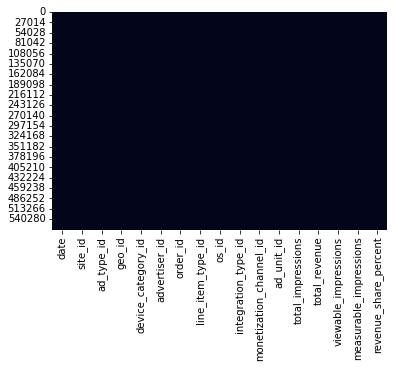

In [43]:
sns.heatmap(df.isnull(),cbar=False,cbar_kws={'color':'r'})
plt.show()

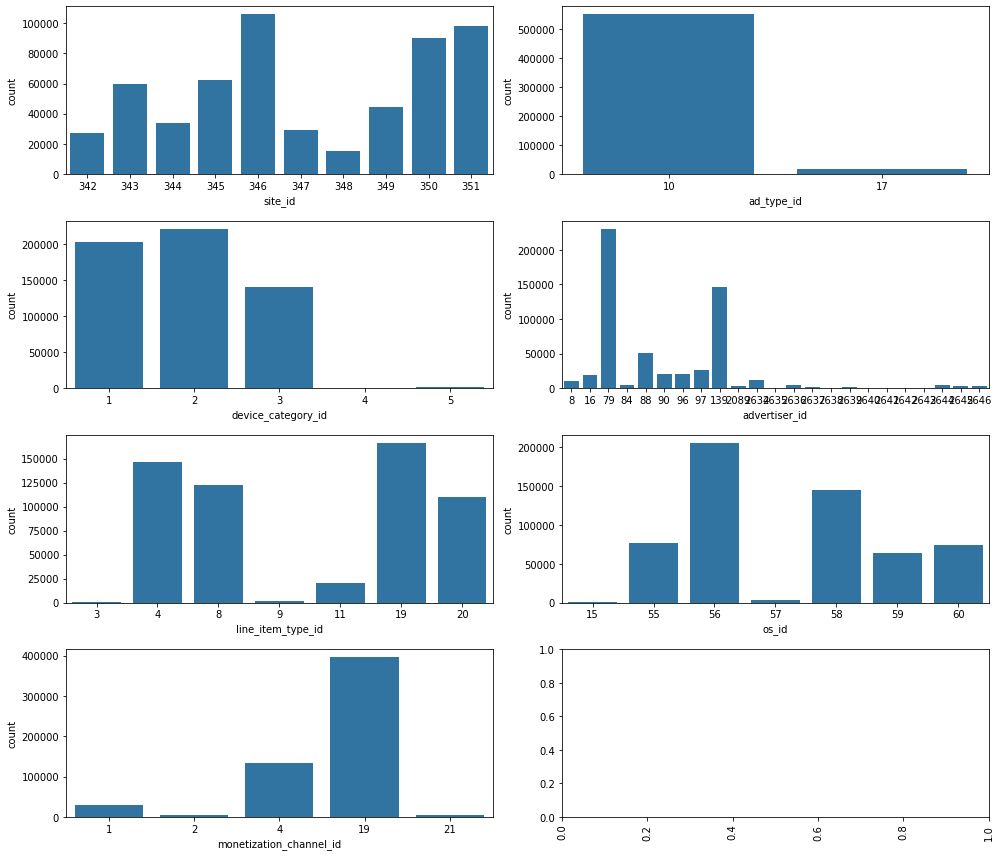

In [46]:
fig, ax = plt.subplots(4,2, figsize=(14,12))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i,col in enumerate(scat_col):
    sns.countplot(data=df,x=col,ax=axes_[i])
    if col=='advertiser_id':
        plt.xticks(rotation=90)
    plt.tight_layout()

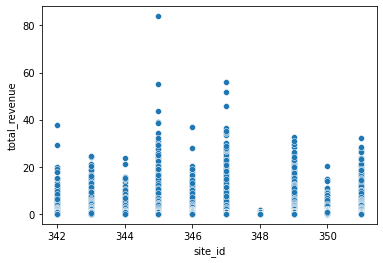

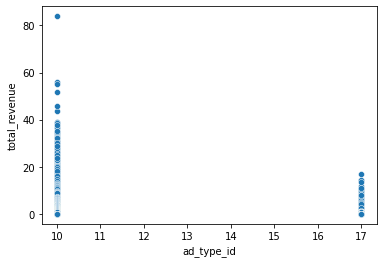

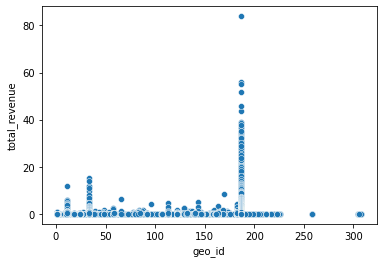

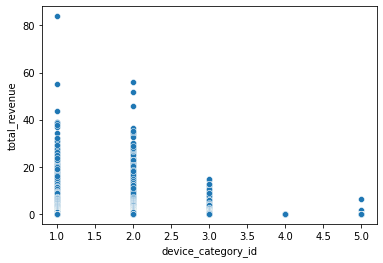

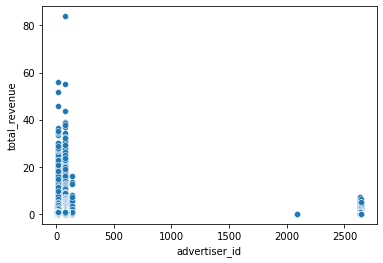

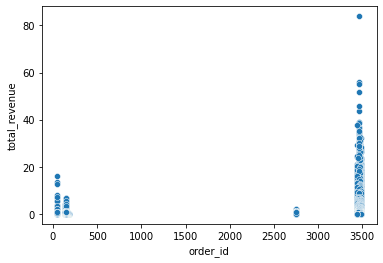

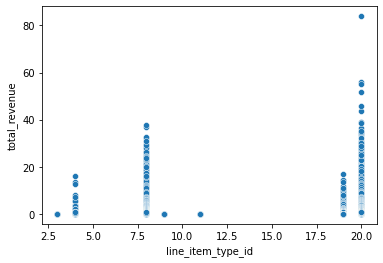

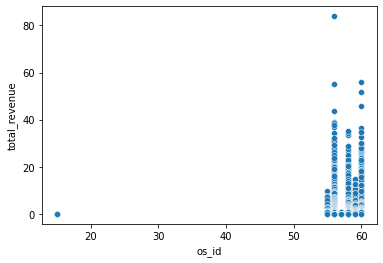

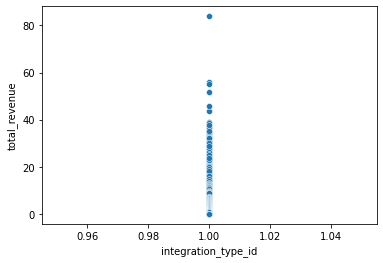

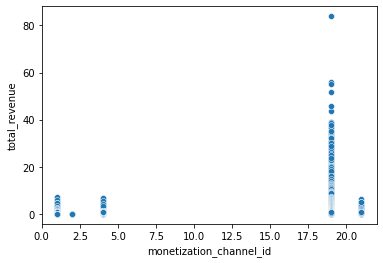

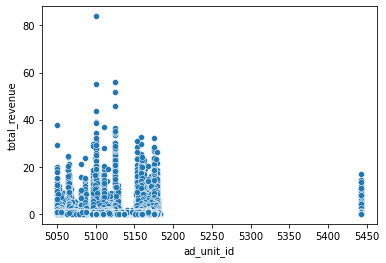

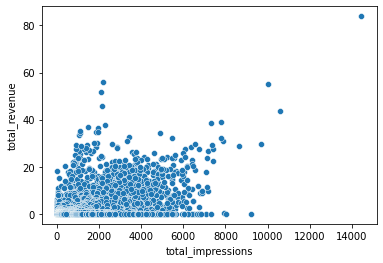

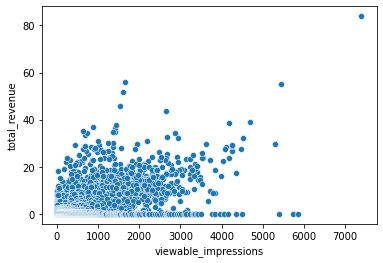

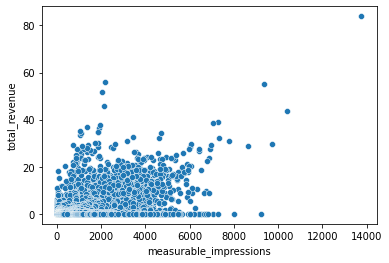

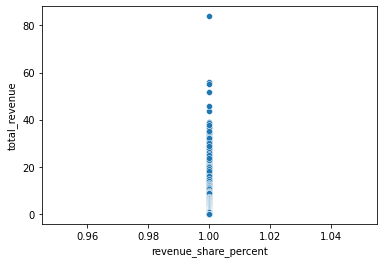

In [47]:
for i in num_col:
    if i!='total_revenue':
        sns.scatterplot(data=df,x=i,y='total_revenue')
        plt.show()

In [48]:
df1.max()

DATE                       30-06-2024 00:00
SITE_ID                                 351
AD_TYPE_ID                               17
GEO_ID                                  308
DEVICE_CATEGORY_ID                        5
ADVERTISER_ID                          2646
ORDER_ID                               3489
LINE_ITEM_TYPE_ID                        20
OS_ID                                    60
INTEGRATION_TYPE_ID                       1
MONETIZATION_CHANNEL_ID                  21
AD_UNIT_ID                             5443
TOTAL_IMPRESSIONS                     14452
TOTAL_REVENUE                        83.822
VIEWABLE_IMPRESSIONS                   7392
MEASURABLE_IMPRESSIONS                13756
REVENUE_SHARE_PERCENT                     1
dtype: object

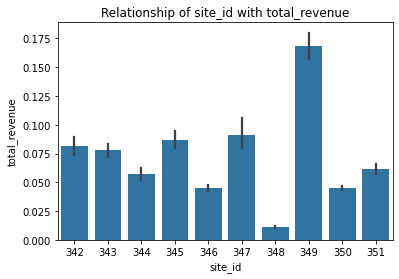

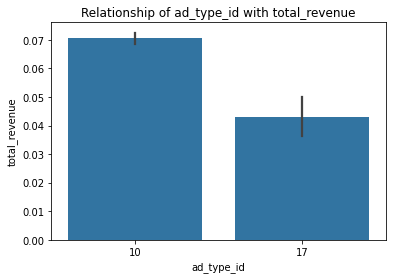

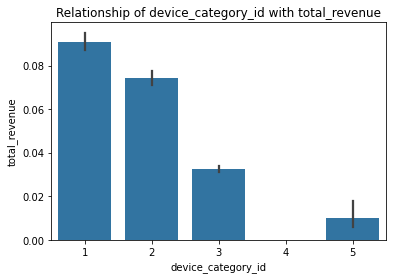

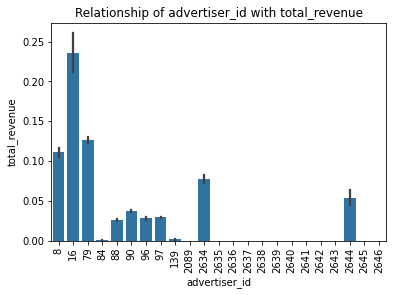

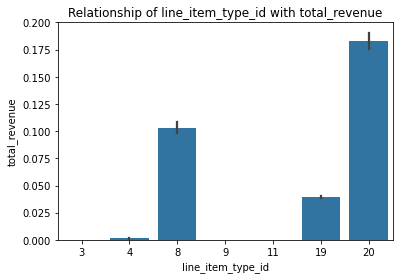

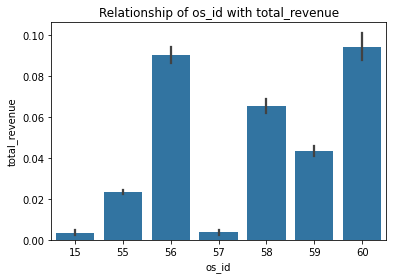

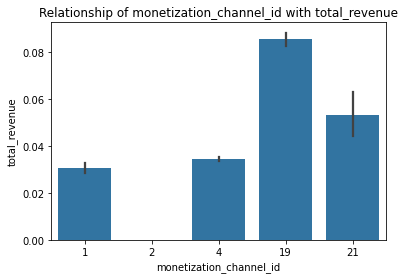

In [49]:
for col in (scat_col):
    title='Relationship of '+col+' with total_revenue'
    plt.figure(figsize=(6,4))
    sns.barplot(y=df['total_revenue'],x=df[col])
    if col=='advertiser_id':
        plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

In [ ]:
for col in (scat_col):
    title='Relationship of '+ col +' with total_impressions'
    plt.figure(figsize=(6,4))
    sns.barplot(y=df['total_impressions'],x=df[col],)
    if col=='advertiser_id':
        plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

In [ ]:
cat_col=['date','geo_id','order_id','site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']

scat_col = ['site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']

for i in cat_col:
    df[i]=df[i].astype('object')

In [ ]:
df.drop(['ad_unit_id','revenue_share_percent','integration_type_id'],axis=1,inplace=True)
df.drop(['ad_type_id','site_id','advertiser_id'],axis=1,inplace=True)
df.drop(['date','geo_id','order_id'],axis=1,inplace=True)

In [ ]:
df.select_dtypes(object)

In [ ]:
for i in df.select_dtypes(object).columns:
    pd.crosstab(df['monetization_channel_id'],df[i]).plot(kind='bar')
    plt.show()

# Predictive Modelling

In [ ]:
Xd = df.drop('total_revenue',axis=1)
y = df['total_revenue']

In [ ]:
X=pd.get_dummies(Xd,drop_first=True)

In [ ]:
pc_col=['total_impressions', 'viewable_impressions', 'measurable_impressions']

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
X[pc_col]=pd.DataFrame(ss.fit_transform(X[pc_col]),columns=[pc_col])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
# Applying PCA (principal component analysis)

In [ ]:
from sklearn.decomposition import PCA
pc_col=['total_impressions', 'viewable_impressions', 'measurable_impressions']
pca = PCA()
pca.fit(X[pc_col])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
pca = PCA(n_components=1)
cc = pca.fit_transform(X_train[pc_col])
cd = pca.transform(X_test[pc_col])

In [ ]:
X_train['PC']=cc
X_test['PC']=cd

In [ ]:
X_train.drop(pc_col,axis=1,inplace=True)
X_test.drop(pc_col,axis=1,inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

In [ ]:
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)

print('Train')
print('R2 Score:',r2_score(y_train,y_train_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_train,y_train_pred))

y_test_pred=lr.predict(X_test)

print('\n\nTest')
print('R2 Score:',r2_score(y_test,y_test_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_test_pred))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor()

rfr.fit(X_train,y_train)
y_train_pred=rfr.predict(X_train)

print('r2 Train',r2_score(y_train,y_train_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

y_test_pred=rfr.predict(X_test)

print('\n\nTest')
print('\nr2 Test',r2_score(y_test,y_test_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [ ]:
rfrbest1 = {'max_depth': 12,
 'max_features': 8,
 'min_samples_leaf': 3,
 'n_estimators': 160}

In [ ]:
rfr = RandomForestRegressor(**rfrbest1)

rfr.fit(X_train,y_train)
y_train_pred=rfr.predict(X_train)

print('r2 Train',r2_score(y_train,y_train_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

y_test_pred=rfr.predict(X_test)

print('\n\nTest')
print('\nr2 Test',r2_score(y_test,y_test_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

# rfr = RandomForestRegressor() param_dist = {'n_estimators':sp_randint(25,250), 'max_features':sp_randint(1,24), 'max_depth':sp_randint(2,15), 'min_samples_leaf':sp_randint(1,50)} rsearch = RandomizedSearchCV(rfr,param_distributions=param_dist,scoring='r2', n_iter=10,cv=3,n_jobs=-1,random_state=4) rsearch.fit(X_train,y_train) rsearch.best_params_

In [ ]:
rfrbest2 = {'max_depth': 12,
 'max_features': 15,
 'min_samples_leaf': 6,
 'n_estimators': 154}

In [ ]:
rfr = RandomForestRegressor(**rfrbest2)

rfr.fit(X_train,y_train)
y_train_pred=rfr.predict(X_train)

print('r2 Train',r2_score(y_train,y_train_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

y_test_pred=rfr.predict(X_test)

print('\n\nTest')
print('\nr2 Test',r2_score(y_test,y_test_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rfr = RandomForestRegressor()

param_dist = {'n_estimators':np.arange(50,250,50), 'max_features':np.arange(1,21,4), 'max_depth':[1,5,10,15], 'min_samples_leaf':[1,5,10,20,40,50]}

rsearch = GridSearchCV(rfr,param_grid=param_dist,scoring='r2', cv=3,n_jobs=-1) 
rsearch.fit(X_train,y_train) 
rsearch.bestparams

In [ ]:
rfr = RandomForestRegressor(**rsearch.bestparams)
rfr.fit(X_train,y_train) y_train_pred=rfr.predict(X_train)
print('r2 Train',r2_score(y_train,y_train_pred)) 
print('RMSE Train:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

In [ ]:
y_test_pred=rfr.predict(X_test)
print('\n\nTest') 
print('\nr2 Test',r2_score(y_test,y_test_pred)) 
print('RMSE Train:',np.sqrt(mean_squared_error(y_test,y_test_pred)))